In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames[:5]:
#         print(os.path.join(dirname, filename))

# /kaggle/input/fast-food-classification-dataset/Fast Food Data/Training Data/Pizza/Pizza-Train (907).jpeg

# import datasets use keras 

In [2]:
import glob 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd 



In [3]:
train_data_dir ='/kaggle/input/fast-food-classification-dataset/Fast Food Data/Training Data' 
val_data_dir = '/kaggle/input/fast-food-classification-dataset/Fast Food Data/Validation Data'

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (180,180),
    batch_size=32,
    # class_mode default value is clasification
)
val_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (180,180),
    batch_size=32,
    
)

Found 7500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


In [5]:
labels = ['Burger','Donut','Hot Dog','Pizza','Sandwich']

# build the model 

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet',include_top=False)


2022-12-05 12:34:34.570655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 12:34:34.667664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 12:34:34.668466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 12:34:34.669699: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
# from keras.layers.serialization import activation
result = model.output 
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
result = GlobalAveragePooling2D()(result)
result = Dense(512,activation='relu')(result)
predictions = Dense(5,activation='sigmoid')(result)

In [10]:
import tensorflow as tf 
from tensorflow.keras.models import Model
resnet_model = Model(inputs=model.input,outputs=predictions)

resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(
#     model,to_file = 'vgg_model.png'
# )

In [11]:
with tf.device("/device:GPU:0"):
    
    history = resnet_model.fit_generator(
        train_generator,
        epochs=50,
        shuffle=True,
        verbose=1,
        validation_data=val_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-05 12:35:15.236918: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-12-05 12:35:21.368837: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 73/235 [========>.....................] - ETA: 36s - loss: 2.6093 - accuracy: 0.2149

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


235/235 [==============================] - 85s 309ms/step - loss: 1.9135 - accuracy: 0.2400 - val_loss: 1.6177 - val_accuracy: 0.2000
Epoch 2/50
235/235 [==============================] - 45s 191ms/step - loss: 1.4966 - accuracy: 0.3369 - val_loss: 2.3415 - val_accuracy: 0.2000
Epoch 3/50
235/235 [==============================] - 45s 190ms/step - loss: 1.3279 - accuracy: 0.4384 - val_loss: 2.3708 - val_accuracy: 0.2120
Epoch 4/50
235/235 [==============================] - 45s 190ms/step - loss: 1.2984 - accuracy: 0.4480 - val_loss: 2.8088 - val_accuracy: 0.2024
Epoch 5/50
235/235 [==============================] - 44s 189ms/step - loss: 1.2557 - accuracy: 0.4784 - val_loss: 1.8934 - val_accuracy: 0.1916
Epoch 6/50
235/235 [==============================] - 45s 190ms/step - loss: 1.2163 - accuracy: 0.4940 - val_loss: 1.1948 - val_accuracy: 0.5024
Epoch 7/50
235/235 [==============================] - 44s 189ms/step - loss: 1.1978 - accuracy: 0.4985 - val_loss: 1.7445 - val_accuracy: 0.3

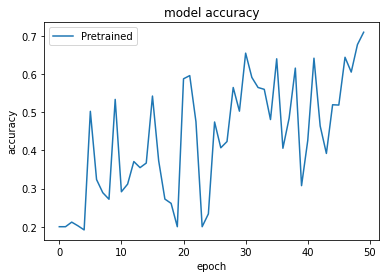

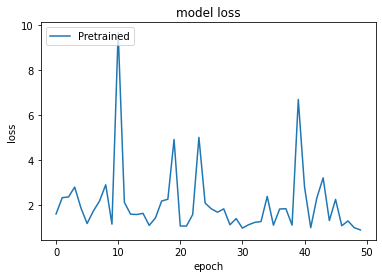

In [12]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()

In [16]:
history.history['accuracy'][-1]

0.8547999858856201